# Product Category Classification

In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

## Summary
- <a href='#1'>1. Data Loading</a>
- <a href='#2'>1. Data Preprocessing</a>
    - <a href='#2.1'>2.1.  Data Analysis</a>
    - <a href='#2.2'>2.2.  Data Preprocessing</a>
- <a href='#3'>3.  ML Approaches</a>
    - <a href='#3.1'>3.1  Traditional Approach main_text column</a>
    - <a href='#3.2'>3.2  Traditional Approach with add_text column</a>
    - <a href='#3.3'>3.3  Traditional Approach with add_text and manufacturer columns</a>
    - <a href='#3.4'>3.4  Traditional Approach with all text columns</a>
- <a href='#4'>4. Model Export</a> 
- <a href='#5'>5. Conclusion</a>

# <a id='1'>1. Data Loading</a>

In [2]:
FILE_PATH = "../../data/testset_C.csv" # File Path where the training files are located

In [3]:
df = pd.read_csv(FILE_PATH, sep=';')

In [4]:
df

,id,productgroup,main_text,add_text,manufacturer
0,26229701,WASHINGMACHINES,WAQ284E25,WASCHMASCHINEN,BOSCH
1,16576864,USB MEMORY,LEEF IBRIDGE MOBILE SPEICHERERWEITERUNG FUER I...,PC__1100COMPUTINGMEMORY__1110MEMORYCARDS,LEEF
2,26155618,USB MEMORY,SANDISK 32GB ULTRA FIT USB 3.0,W1370,NaN
3,25646138,BICYCLES,HOLLANDRAD DAMEN 28 ZOLL TUSSAUD 3-GAENGE RH 5...,FAHRRAEDER // SPORTFAHRRAEDER,SCHALOW & KROH GMBH
4,19764614,BICYCLES,DAHON SPEED D7 SCHWARZ ? FALTRAD,SPORTS__30000WHEELED__30070BIKES,DAHON
...,...,...,...,...,...
7995,61028716,BICYCLES,TOPSY KINDERRAD 12 1/2 POLARWEISS O O O 419640,H006W0792344__WERKZEUG_AUTO/FAHRRAD_FAHRRAEDER,SI-ZWEIRAD-VERTRIEBS GMBH
7996,37734138,BICYCLES,CREME ECHO SOLO 16-SPEED WHITE,FAHRRAEDER>>RENNRAEDER>>RENNRAEDER,CREME
7997,17891755,CONTACT LENSES,"ACUVUE 1-DAY MOIST TAGESLINSEN WEICH, 30 STUEC...",HEALTH&PERSONALCARE__3100OPTICS__3101SPHERICCO...,JOHNSON & JOHNSON
7998,42298563,BICYCLES,UNIVEGA TERRENO 1.0 HE MATTBLAUGRAU 45 CM,1_7_4,UNIVEGA


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            8000 non-null   int64 
 1   productgroup  8000 non-null   object
 2   main_text     7998 non-null   object
 3   add_text      8000 non-null   object
 4   manufacturer  6656 non-null   object
dtypes: int64(1), object(4)
memory usage: 312.6+ KB


# <a id='2'>2. Data Preprocessing</a>

## <a id='2'>2.1.  Data Analysis</a>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            8000 non-null   int64 
 1   productgroup  8000 non-null   object
 2   main_text     7998 non-null   object
 3   add_text      8000 non-null   object
 4   manufacturer  6656 non-null   object
dtypes: int64(1), object(4)
memory usage: 312.6+ KB


In [7]:
df.head(2)

,id,productgroup,main_text,add_text,manufacturer
0,26229701,WASHINGMACHINES,WAQ284E25,WASCHMASCHINEN,BOSCH
1,16576864,USB MEMORY,LEEF IBRIDGE MOBILE SPEICHERERWEITERUNG FUER I...,PC__1100COMPUTINGMEMORY__1110MEMORYCARDS,LEEF


BICYCLES           2000
WASHINGMACHINES    2000
USB MEMORY         2000
CONTACT LENSES     2000
Name: productgroup, dtype: int64


<AxesSubplot:>

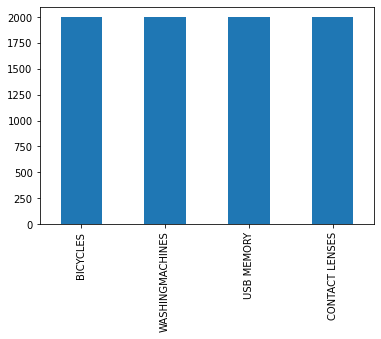

In [8]:
print(df.productgroup.value_counts())
df.productgroup.value_counts().plot(kind='bar')

/                  1700
USB                1307
STÜCKUNISEX        1065
CM                  618
USB-STICK           525
                   ... 
RT,                   1
BLUE'N'FLASHRED       1
7012                  1
WM14E197              1
(STICK)               1
Length: 9803, dtype: int64


<AxesSubplot:>

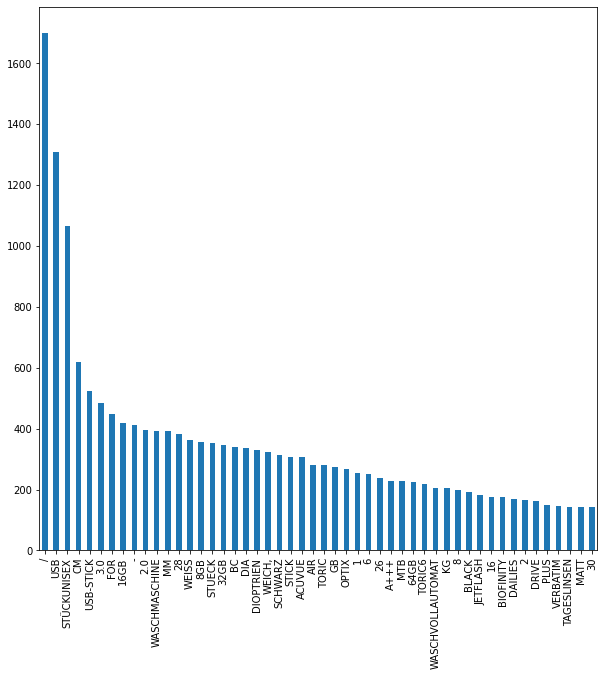

In [9]:
print(df.main_text.str.split(expand=True).stack().value_counts())

df.main_text.str.split(expand=True).stack().value_counts()[0:50].plot(kind='bar',figsize=(10,10))

# We have 8319 different words for our training set as we can see the words that are more common to appear is 
#prepositions "the, of, and so on "

WASCHVOLLAUTOMAT OMV510A+ OMV510A+|| EEK:A+, 1000 U/MIN, 5KG KAPAZITAET  5043487                                                                                        85
PROCLEAR TORIC6 STÜCKUNISEX                                                                                                                                             75
AIR OPTIX FOR ASTIGM.6 STÜCKUNISEX                                                                                                                                      74
BIOFINITY TORIC 6ER BOX6 STÜCKUNISEX                                                                                                                                    71
SOFLENS TORIC6 STÜCKUNISEX                                                                                                                                              68
                                                                                                                                                 

<AxesSubplot:>

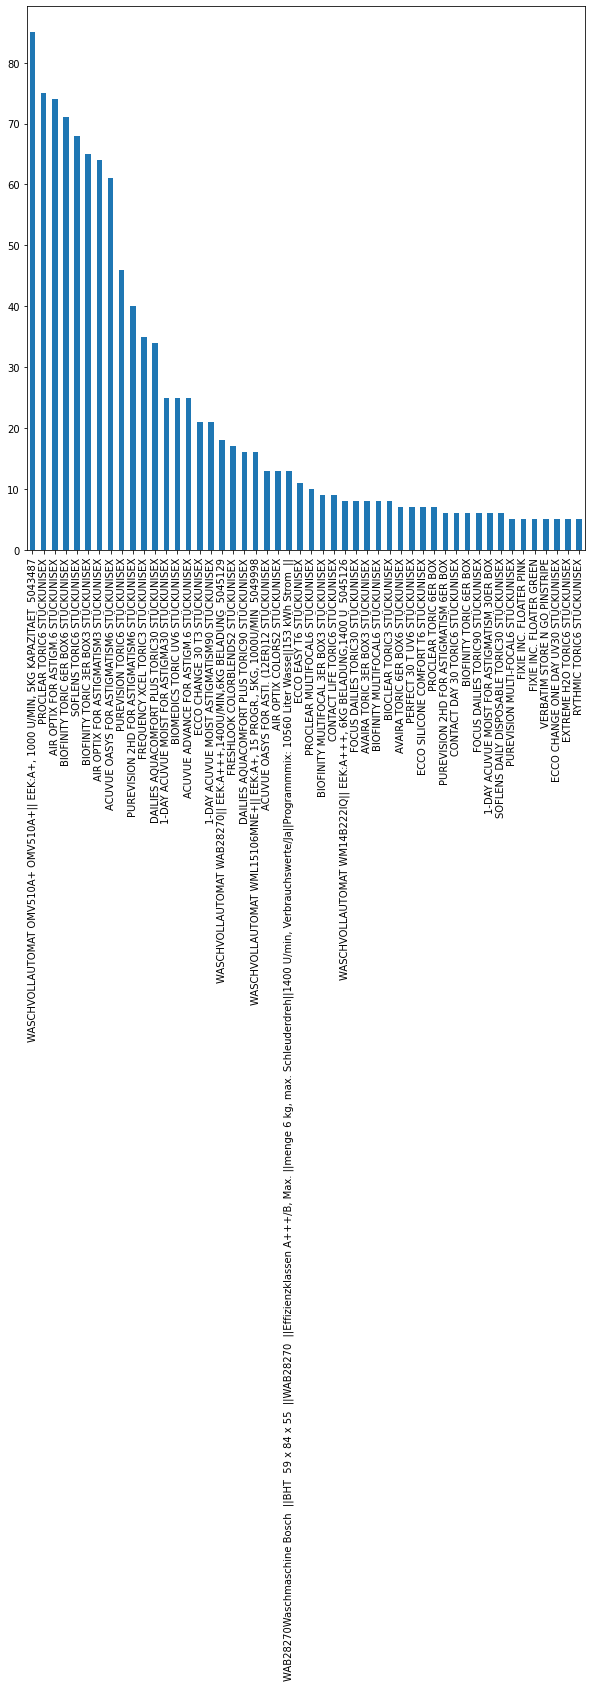

In [10]:
print(df.main_text.value_counts())
df.main_text.value_counts()[0:50].plot(kind='bar',figsize=(10,10))

In [11]:
length_of_the_messages = df["main_text"].str.split()
print("Max number of words inside a text = ", length_of_the_messages.str.len().max())
print("Mean number of words = ", length_of_the_messages.str.len().mean())

# the mean number of words inside a text is about 3 words and the max text found has 102 words

Max number of words inside a text =  214.0
Mean number of words =  7.4533633408352085


In [12]:
df[df.productgroup == "WASHINGMACHINES"].main_text.value_counts()

WASCHVOLLAUTOMAT OMV510A+ OMV510A+|| EEK:A+, 1000 U/MIN, 5KG KAPAZITAET  5043487                                                                                                                                     85
WASCHVOLLAUTOMAT WAB28270|| EEK:A+++,1400U/MIN,6KG BELADUNG  5045129                                                                                                                                                 18
WASCHVOLLAUTOMAT WML15106MNE+|| EEK:A+, 15 PROGR., 5KG, 1000U/MIN  5049998                                                                                                                                           16
WAB28270Waschmaschine Bosch  ||BHT  59 x 84 x 55  ||WAB28270  ||Effizienzklassen A+++/B, Max. ||menge 6 kg, max. Schleuderdreh||1400 U/min, Verbrauchswerte/Ja||Programmmix: 10560 Liter Wasse||153 kWh Strom  ||    13
WASCHVOLLAUTOMAT WM14B222IQ|| EEK:A+++, 6KG BELADUNG,1400 U  5045126                                                                    

In [13]:
df[df.productgroup == "BICYCLES"].main_text.value_counts()

FIXIE INC. FLOATER GREEN                                      5
FIXIE INC. FLOATER PINK                                       5
CUBE ACID BLACK'N'FLASHYELLOW                                 3
SERIOUS ROCKVILLE 26 BLACK/GREEN                              3
2. WAHL VERMONT KINARA HERREN SCHWARZ MATT                    3
                                                             ..
BICYCLES LISSABON HERREN MATTBLAU 60 CM                       1
HOLLANDRAD BULEVA SCHWARZ-ROT 50 CM                           1
UNIVEGA TERRENO 5.0 XXL ROYALBLUEMATT 55 CM                   1
ORBEA ORDU M15 SPECIAL EDITION CARB/WHITE                     1
CORRATEC X-VERT S 650B 0.4 27,5 BLACK MATT/BLUE/LIME GREEN    1
Name: main_text, Length: 1911, dtype: int64

In [14]:
df[(df.productgroup == "USB MEMORY") ].main_text.value_counts()

VERBATIM STORE N GO PINSTRIPE                                  5
VERBATIM STORE N GO V3                                         4
LEXAR JUMPDRIVE USB 3.0 32GB                                   3
SONY MICRO VAULT USM-X 8GB                                     3
VERBATIM MINI METAL                                            3
                                                              ..
TRANSCEND 64GB JETFLASH 710SILVERUS                            1
USB 3.0 STICK 16GB, ULTRA FIT                                  1
LEEF  SUPRA USB 3.0 32GB LS300SX032E4U                         1
3330079032  TRANSCEND JETFLASH 790K 32GB USB 3.0               1
USB-STICK  16GB SILICON POWER  C80  3.0 SILVER TYPE-C READY    1
Name: main_text, Length: 1944, dtype: int64

In [15]:
df[(df.productgroup == "CONTACT LENSES")].main_text.value_counts()

PROCLEAR TORIC6 STÜCKUNISEX                                                                          75
AIR OPTIX FOR ASTIGM.6 STÜCKUNISEX                                                                   74
BIOFINITY TORIC 6ER BOX6 STÜCKUNISEX                                                                 71
SOFLENS TORIC6 STÜCKUNISEX                                                                           68
BIOFINITY TORIC 3ER BOX3 STÜCKUNISEX                                                                 65
                                                                                                     ..
CONTACTLINSEN HEINRICH WÖHLK CONTACTLINSEN CONTACT INDIVIDUAL SH TDS                                  1
FRESHLOOK COLOR BLENDS  1 MONTH  PACK:4                                                               1
DYN. KERATO TORIC                                                                                     1
CONTACTLINSEN BAUSCH+LOMB BIOTRUE ONEDAY 30ER BOX               

## <a id='2.2'>2.2.  Data Preparation/preprocessing</a>

In [16]:
len(df)

8000

In [17]:
# drop rows with only two character and that doesn't add anything to the model 
df_train_preprocessing = df[( df["main_text"].str.len() > 1 )] 

In [18]:
df_train_preprocessing.productgroup.value_counts()

BICYCLES           2000
CONTACT LENSES     2000
WASHINGMACHINES    1999
USB MEMORY         1999
Name: productgroup, dtype: int64

In [19]:
len(df_train_preprocessing)

7998

In [20]:
df_train_preprocessing = df_train_preprocessing.drop('id', axis=1)

In [21]:
df_train_preprocessing.productgroup.value_counts()

BICYCLES           2000
CONTACT LENSES     2000
WASHINGMACHINES    1999
USB MEMORY         1999
Name: productgroup, dtype: int64

In [22]:
df_train_preprocessing.loc[:,'main_text'] = df_train_preprocessing.main_text.astype('str')
df_train_preprocessing.loc[:,'add_text'] = df_train_preprocessing.add_text.astype('str')
df_train_preprocessing.loc[:,'manufacturer'] = df_train_preprocessing.manufacturer.astype('str')

In [23]:
df_train_preprocessing['all_text'] = df_train_preprocessing['main_text']+ ' ' +df_train_preprocessing['add_text'] + ' ' + df_train_preprocessing['manufacturer']

In [24]:
df_train_preprocessing['all_text']

0                          WAQ284E25 WASCHMASCHINEN BOSCH
1       LEEF IBRIDGE MOBILE SPEICHERERWEITERUNG FUER I...
2                SANDISK 32GB ULTRA FIT USB 3.0 W1370 nan
3       HOLLANDRAD DAMEN 28 ZOLL TUSSAUD 3-GAENGE RH 5...
4       DAHON SPEED D7 SCHWARZ ? FALTRAD SPORTS__30000...
                              ...                        
7995    TOPSY KINDERRAD 12 1/2 POLARWEISS O O O  41964...
7996    CREME ECHO SOLO 16-SPEED WHITE FAHRRAEDER>>REN...
7997    ACUVUE 1-DAY MOIST TAGESLINSEN WEICH, 30 STUEC...
7998    UNIVEGA TERRENO 1.0 HE MATTBLAUGRAU 45 CM 1_7_...
7999    LAVAMAT 63479 FL A+++ WASCHVOLLAUTOMAT WASCHMA...
Name: all_text, Length: 7998, dtype: object

## <a id='3'>3  ML Approaches</a>

I will focus on testing a Traditional approach vs a Deep learning approach

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier

In [26]:
# get the params
tfidf_params = dict(sublinear_tf= True, 
                       min_df = 1, 
                       norm= 'l2',
                       ngram_range= (1,2), 
                       stop_words ='english')

In [27]:
# create a Pipeline that will do features transformation then pass to the model for all training
clf_NB = Pipeline(steps=[
('features', TfidfVectorizer(**tfidf_params)),
('model', MultinomialNB())
])

clf_XGB = Pipeline(steps=[
('features', TfidfVectorizer(**tfidf_params)),
('model', XGBClassifier())
])

## <a id='3.1'>3.1  Traditional Approach with main_text</a>

In [28]:

X_train, X_test, y_train, y_test = train_test_split(df_train_preprocessing['main_text'], 
                                                    df_train_preprocessing['productgroup'],
                                                    stratify=df_train_preprocessing['productgroup'], 
                                                    test_size=0.10)

# Use clf as a model, fit X_train and y_train
clf_NB.fit(X_train, y_train)

# predicted 
y_pred = clf_NB.predict(X_test)

report_nb_nopreprocessing = metrics.classification_report(y_test, y_pred)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy NB: ",accuracy)

Accuracy NB:  0.985


In [29]:
# Use xgb as a model, fit X_train and y_train
clf_XGB.fit(X_train, y_train)

# predicted 
y_pred = clf_XGB.predict(X_test)

report_xgb_nopreprocessing = metrics.classification_report(y_test, y_pred)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy XGB: ",accuracy)

Accuracy XGB:  0.97375


### Results

In [30]:
print(report_nb_nopreprocessing)
print("\n")
print(report_xgb_nopreprocessing)

                 precision    recall  f1-score   support

       BICYCLES       0.95      1.00      0.98       200
 CONTACT LENSES       1.00      1.00      1.00       200
     USB MEMORY       0.99      0.98      0.99       200
WASHINGMACHINES       0.99      0.96      0.98       200

       accuracy                           0.98       800
      macro avg       0.99      0.98      0.99       800
   weighted avg       0.99      0.98      0.99       800



                 precision    recall  f1-score   support

       BICYCLES       1.00      0.97      0.98       200
 CONTACT LENSES       1.00      0.96      0.98       200
     USB MEMORY       1.00      0.96      0.98       200
WASHINGMACHINES       0.90      1.00      0.95       200

       accuracy                           0.97       800
      macro avg       0.98      0.97      0.97       800
   weighted avg       0.98      0.97      0.97       800



## <a id='3.2'>3.2 Traditional Approach with add_text column</a>



In [31]:
X_train, X_test, y_train, y_test = train_test_split(df_train_preprocessing['add_text'], 
                                                    df_train_preprocessing[['productgroup']],
                                                    stratify=df_train_preprocessing['productgroup'], 
                                                    test_size=0.20)


In [32]:
# Use clf as a model, fit X_train and y_train
clf_NB.fit(X_train, y_train)

# predicted 
y_pred = clf_NB.predict(X_test)

report_nb_nopreprocessing = metrics.classification_report(y_test, y_pred)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy NB: ",accuracy)

Accuracy NB:  0.954375


/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [33]:
# Use clf as a model, fit X_train and y_train
clf_XGB.fit(X_train, y_train)

# predicted 
y_pred = clf_XGB.predict(X_test)

report_xgb_nopreprocessing = metrics.classification_report(y_test, y_pred)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy XGB: ",accuracy)

/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy XGB:  0.911875


###  Results

In [34]:
print("Report Naive Bayes With Preprocessing\n")

print(report_nb_nopreprocessing)

print("Report XGBoost With Preprocessing\n")

print(report_xgb_nopreprocessing)

Report Naive Bayes With Preprocessing

                 precision    recall  f1-score   support

       BICYCLES       0.92      0.99      0.95       400
 CONTACT LENSES       1.00      0.94      0.97       400
     USB MEMORY       0.99      0.91      0.95       400
WASHINGMACHINES       0.92      0.97      0.95       400

       accuracy                           0.95      1600
      macro avg       0.96      0.95      0.95      1600
   weighted avg       0.96      0.95      0.95      1600

Report XGBoost With Preprocessing

                 precision    recall  f1-score   support

       BICYCLES       1.00      0.88      0.94       400
 CONTACT LENSES       1.00      0.93      0.96       400
     USB MEMORY       0.99      0.84      0.91       400
WASHINGMACHINES       0.74      1.00      0.85       400

       accuracy                           0.91      1600
      macro avg       0.93      0.91      0.92      1600
   weighted avg       0.93      0.91      0.92      1600



## <a id='3.3'>3.3 Traditional Approach with add_text and manufacturer column</a>

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df_train_preprocessing['manufacturer'], 
                                                    df_train_preprocessing[['productgroup']],
                                                    stratify=df_train_preprocessing['productgroup'], 
                                                    test_size=0.20)


In [36]:
# Use clf as a model, fit X_train and y_train
clf_NB.fit(X_train, y_train)

# predicted 
y_pred = clf_NB.predict(X_test)

report_nb_nopreprocessing = metrics.classification_report(y_test, y_pred)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy NB: ",accuracy)

Accuracy NB:  0.818125


/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [37]:
# Use clf as a model, fit X_train and y_train
clf_XGB.fit(X_train, y_train)

# predicted 
y_pred = clf_XGB.predict(X_test)

report_xgb_nopreprocessing = metrics.classification_report(y_test, y_pred)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy XGB: ", accuracy)

/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy XGB:  0.838125


In [38]:

print("Report Naive Bayes With Preprocessing without other label\n")

print(report_nb_nopreprocessing)

print("Report XGBoost With Preprocessing without other label\n")

print(report_xgb_nopreprocessing)

Report Naive Bayes With Preprocessing without other label

                 precision    recall  f1-score   support

       BICYCLES       0.59      1.00      0.74       400
 CONTACT LENSES       0.99      0.69      0.81       400
     USB MEMORY       1.00      0.80      0.89       400
WASHINGMACHINES       0.98      0.79      0.87       400

       accuracy                           0.82      1600
      macro avg       0.89      0.82      0.83      1600
   weighted avg       0.89      0.82      0.83      1600

Report XGBoost With Preprocessing without other label

                 precision    recall  f1-score   support

       BICYCLES       0.68      0.93      0.78       400
 CONTACT LENSES       0.83      0.90      0.86       400
     USB MEMORY       0.99      0.78      0.87       400
WASHINGMACHINES       0.98      0.76      0.85       400

       accuracy                           0.84      1600
      macro avg       0.87      0.84      0.84      1600
   weighted avg       0.87

## <a id='3.4'>3.4 Traditional Approach with all text columns</a>

In [61]:
X_train, X_test, y_train, y_test = train_test_split(df_train_preprocessing['all_text'], 
                                                    df_train_preprocessing[['productgroup']],
                                                    stratify=df_train_preprocessing['productgroup'], 
                                                    test_size=0.10)

In [62]:
# Use clf as a model, fit X_train and y_train
clf_NB.fit(X_train, y_train)

# predicted 
y_pred = clf_NB.predict(X_test)

report_nb_nopreprocessing = metrics.classification_report(y_test, y_pred)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy NB: ",accuracy)

Accuracy NB:  1.0


/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [63]:
# Use clf as a model, fit X_train and y_train
clf_XGB.fit(X_train, y_train)

# predicted 
y_pred = clf_XGB.predict(X_test)

report_xgb_all_cols = metrics.classification_report(y_test, y_pred)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy XGB: ", accuracy)

/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy XGB:  0.9925


In [64]:

print("Report Naive Bayes With Preprocessing without other label\n")

print(report_xgb_all_cols)

print("Report XGBoost With Preprocessing without other label\n")

print(report_xgb_all_cols)

Report Naive Bayes With Preprocessing without other label

                 precision    recall  f1-score   support

       BICYCLES       1.00      0.99      0.99       200
 CONTACT LENSES       0.99      1.00      1.00       200
     USB MEMORY       0.99      1.00      0.99       200
WASHINGMACHINES       0.99      0.98      0.99       200

       accuracy                           0.99       800
      macro avg       0.99      0.99      0.99       800
   weighted avg       0.99      0.99      0.99       800

Report XGBoost With Preprocessing without other label

                 precision    recall  f1-score   support

       BICYCLES       1.00      0.99      0.99       200
 CONTACT LENSES       0.99      1.00      1.00       200
     USB MEMORY       0.99      1.00      0.99       200
WASHINGMACHINES       0.99      0.98      0.99       200

       accuracy                           0.99       800
      macro avg       0.99      0.99      0.99       800
   weighted avg       0.99

# <a id='4'>4 Model Export</a>

In [68]:
### Create a Pickle file for using in our rest api using serialization 
import pickle
pickle_out = open("../models/product_classification_model_v0.0.pkl","wb")
pickle.dump(clf_XGB, pickle_out)
pickle_out.close()

In [69]:
pickle_in = open("../models/product_classification_model_v0.0.pkl","rb")
model=pickle.load(pickle_in)

In [70]:
model

Pipeline(steps=[('features',
                 TfidfVectorizer(ngram_range=(1, 2), stop_words='english',
                                 sublinear_tf=True)),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=1, tre

# <a id='5'>5 Conclusion</a>

I was able to train a model to classify products with 99% of accuracy and a F-score of almost 100% to all the four classes.


I have found that with all the columns increase the performance of the model up to from 98% to  almost 100% in all metrics. 


I found that with this solution there is no need to use a Deep learning Model.